In [116]:
import json
import os
import re
import hashlib


In [117]:
with open("./chatbot-arena-spoken-1turn-english-subset1000.json") as f:
    data = json.load(f)
noise_added = []
for i in range(len(data)):
    hashed = hashlib.sha256(data[i]['question_id'].encode()).digest()
    bit = hashed[0] & 1
    if bit == 0:
        # noise added to model_a
        noise_added.append('A')
    else:
        # noise added to model_b
        noise_added.append('B')

In [118]:
len(noise_added)

1000

In [11]:
def read_jsonl(file_path):
    data = []
    # Open and read the file line by line
    with open(file_path, 'r') as file:
        for line in file:
            # Parse each line as a JSON object
            json_obj = json.loads(line.strip())
            data.append(json_obj)
    print("len:", len(data))
    return data

In [18]:
def process_output(data):
    labels = []
    for x in data:
        response = x['response']
        # response = response[-20:]
        labels += [extract_abc(response)]
    calculate_percentage(labels)
    return labels

In [19]:
def extract_abc(text):
    pattern = r'\[\[(A|B|C)\]\]'
    
    # Search for the match
    match = re.search(pattern, text)
    
    if match:
        result = match.group(1)
        # print(f"Extracted value: {result}")
    else:
        result = "D"
    return result 

In [20]:
def calculate_percentage(arr):
    # Get the total number of items
    total_count = len(arr)
    
    # Create a dictionary to store counts of each unique item
    item_counts = {'A': 0, 'B': 0, 'C': 0, 'D': 0}
    
    for item in arr:
        item_counts[item] = item_counts.get(item, 0) + 1
    
    # Calculate percentages and store them in a dictionary
    percentages = {item: (count / total_count) * 100 for item, count in item_counts.items()}
    
    # Display the result
    print("---------------")
    for item, percentage in percentages.items():
        print(f"{item}: {percentage:.2f}%")
    print("---------------")

In [684]:
def stats(before, after):
    n = min(len(before), len(after))
    count1_remain, count1_swap, count1_tie, count1_error, count1_total = 0, 0, 0, 0, 0
    count2_remain, count2_swap, count2_tie, count2_error, count2_total = 0, 0, 0, 0, 0
    count3_tie, count3_with_noise, count3_no_noise, count3_error, count3_total = 0, 0, 0, 0, 0
    for i in range(n):
        label0 = before[i]
        label1 = after[i]
        noise_added_to = noise_added[i]
    
        # noise added to before's winner
        if label0 == noise_added_to:
            if label0 == label1:
                count1_remain += 1
            elif label1 == 'C':
                count1_tie += 1
            elif label1 == 'D':
                count1_error += 1
            else:
                count1_swap += 1
            count1_total += 1
            
        # noise added to before's loser
        elif label0 != noise_added_to and label0 in ['A', 'B']:
            if label0 == label1:
                count2_remain += 1
            elif label1 == 'C':
                count2_tie += 1
            elif label1 == 'D':
                count2_error += 1
            else:
                count2_swap += 1
            count2_total += 1

        # noise added to before's tie
        elif label0 != noise_added_to and label0 == 'C':
            if label1 == 'C':
                count3_tie += 1
            elif label1 == noise_added_to:
                count3_with_noise += 1 
            elif label1 != noise_added_to:
                count3_no_noise += 1
            else:
                count3_error += 1
            count3_total += 1
        elif label0 == 'D':
            pass
        else:
            raise Exception()
        
            
    print("------ Noise added to before's winner ------")
    print("total:", count1_total)
    print("count_remain: {:.2f}".format(count1_remain/count1_total*100))
    print("count_swappd: {:.2f}".format((count1_swap+count1_tie+count1_error)/count1_total*100))
    # print("count_tie:    {:.2f}".format(count1_tie/count1_total*100))
    # print("count_error:  {:.2f}".format(count1_error/count1_total*100))
    print("------ Noise added to before's loser ------")
    print("total:", count2_total)
    print("count_remain: {:.2f}".format(count2_remain/count2_total*100))
    print("count_swappd: {:.2f}".format((count2_swap+count2_tie+count2_error)/count2_total*100))
    # print("count_tie:    {:.2f}".format(count2_tie/count2_total*100))
    # print("count_error:  {:.2f}".format(count2_error/count2_total*100))
    print("------ Noise added to before's tie ------")
    print("total:", count3_total)
    print("count_tie:        {:.2f}".format(count3_tie/count3_total*100))
    print("count_swap: {:.2f}".format((count3_no_noise+count3_with_noise)/count3_total*100))
    # print("count_no_noise:   {:.2f}".format(count3_no_noise/count3_total*100))
    # print("count_with_noise: {:.2f}".format(count3_with_noise/count3_total*100))
    # print("count_error:      {:.2f}".format(count3_error/count3_total*100))

In [489]:
# path = "./experiments/chatbot-arena-subset1000/audio-audio-gpt4o-awgn-snr100000.jsonl"
# snr1000 = process_output(read_jsonl(path))
# path = "./experiments/chatbot-arena-subset1000/audio-audio-gpt4o-awgn-snr500.jsonl"
# snr500 = process_output(read_jsonl(path))
# path = "./experiments/chatbot-arena-subset1000/audio-audio-gpt4o-awgn-snr40.jsonl"
# snr40 = process_output(read_jsonl(path))
# path = "./experiments/chatbot-arena-subset1000/audio-audio-gpt4o-awgn-snr30.jsonl"
# snr30 = process_output(read_jsonl(path))
# path = "./experiments/chatbot-arena-subset1000/audio-audio-gpt4o-awgn-snr20.jsonl"
# snr20 = process_output(read_jsonl(path))
# path = "./experiments/chatbot-arena-subset1000/audio-audio-gpt4o-awgn-snr10.jsonl"
# snr10 = process_output(read_jsonl(path))
# path = "./experiments/chatbot-arena-subset1000/audio-audio-gpt4o-awgn-snr5.jsonl"
# snr5 = process_output(read_jsonl(path))
# path = "./experiments/chatbot-arena-subset1000/audio-audio-gpt4o-awgn-snr1.jsonl"
# snr1 = process_output(read_jsonl(path))

In [490]:
path = "./experiments/chatbot-arena-subset1000/audio-audio-gpt4o-awgn-snr100000.jsonl"
snr1000a = process_output(read_jsonl(path))

len: 1000
---------------
A: 47.40%
B: 43.30%
C: 9.10%
D: 0.20%
---------------


In [491]:
path = "./experiments/chatbot-arena-subset1000-temp0.0/audio-audio-gpt4o-awgn-snr100000.jsonl"
snr1000 = process_output(read_jsonl(path))
# path = "./experiments/chatbot-arena-subset1000-temp0.0/audio-audio-gpt4o-awgn-snr500.jsonl"
# snr500 = process_output(read_jsonl(path))
# path = "./experiments/chatbot-arena-subset1000-temp0.0/audio-audio-gpt4o-awgn-snr40.jsonl"
# snr40 = process_output(read_jsonl(path))
path = "./experiments/chatbot-arena-subset1000-temp0.0/audio-audio-gpt4o-awgn-snr30.jsonl"
snr30 = process_output(read_jsonl(path))
path = "./experiments/chatbot-arena-subset1000-temp0.0/audio-audio-gpt4o-awgn-snr20.jsonl"
snr20 = process_output(read_jsonl(path))
path = "./experiments/chatbot-arena-subset1000-temp0.0/audio-audio-gpt4o-awgn-snr10.jsonl"
snr10 = process_output(read_jsonl(path))
path = "./experiments/chatbot-arena-subset1000-temp0.0/audio-audio-gpt4o-awgn-snr5.jsonl"
snr5 = process_output(read_jsonl(path))
path = "./experiments/chatbot-arena-subset1000-temp0.0/audio-audio-gpt4o-awgn-snr1.jsonl"
snr1 = process_output(read_jsonl(path))

len: 1000
---------------
A: 49.20%
B: 43.50%
C: 7.30%
D: 0.00%
---------------
len: 1000
---------------
A: 49.60%
B: 42.10%
C: 8.10%
D: 0.20%
---------------
len: 1000
---------------
A: 49.50%
B: 43.20%
C: 7.10%
D: 0.20%
---------------
len: 1000
---------------
A: 48.30%
B: 44.30%
C: 7.20%
D: 0.20%
---------------
len: 1000
---------------
A: 48.40%
B: 43.30%
C: 8.20%
D: 0.10%
---------------
len: 1000
---------------
A: 47.70%
B: 44.10%
C: 8.10%
D: 0.10%
---------------


In [511]:
stats(before=snr1000, after=snr1)

------ Noise added to before's winner ------
total: 418
count_remain: 89.47
count_swappd: 10.53
------ Noise added to before's loser ------
total: 509
count_remain: 90.18
count_swappd: 9.82
------ Noise added to before's tie ------
total: 73
count_tie:        71.23
count_no_noise:   17.81
count_with_noise: 10.96
count_error:      0.00


In [508]:
stats(before=snr1000, after=snr5)

------ Noise added to before's winner ------
total: 418
count_remain: 89.95
count_swappd: 10.05
------ Noise added to before's loser ------
total: 509
count_remain: 93.32
count_swappd: 6.68
------ Noise added to before's tie ------
total: 73
count_tie:        73.97
count_no_noise:   15.07
count_with_noise: 10.96
count_error:      0.00


In [509]:
stats(before=snr1000, after=snr10)

------ Noise added to before's winner ------
total: 418
count_remain: 89.95
count_swappd: 10.05
------ Noise added to before's loser ------
total: 509
count_remain: 93.52
count_swappd: 6.48
------ Noise added to before's tie ------
total: 73
count_tie:        72.60
count_no_noise:   13.70
count_with_noise: 13.70
count_error:      0.00


In [504]:
stats(before=snr1000, after=snr20)

------ Noise added to before's winner ------
total: 418
count_remain: 90.43
count_swappd: 9.57
------ Noise added to before's loser ------
total: 509
count_remain: 93.91
count_swappd: 6.09
------ Noise added to before's tie ------
total: 73
count_tie:        69.86
count_no_noise:   15.07
count_with_noise: 15.07
count_error:      0.00


In [506]:
# stats(before=snr1000, after=snr30)

In [666]:
stats(before=snr1000, after=snr1000a)

------ Noise added to before's winner ------
total: 418
count_remain: 89.47
count_swappd: 10.53
------ Noise added to before's loser ------
total: 509
count_remain: 89.00
count_swappd: 11.00
------ Noise added to before's tie ------
total: 73
count_tie:        72.60
count_no_noise:   15.07
count_with_noise: 12.33
count_error:      0.00


## Sanity Check

In [685]:
path = "./experiments/chatbot-arena-subset1000-temp0.0/audio-audio-gpt4o-awgn-nonoise.jsonl"
nonoise1 = process_output(read_jsonl(path))
path = "./experiments/chatbot-arena-subset1000-temp0.0/audio-audio-gpt4o-awgn-nonoise2.jsonl"
nonoise2 = process_output(read_jsonl(path))

len: 1000
---------------
A: 48.90%
B: 43.80%
C: 7.30%
D: 0.00%
---------------
len: 1000
---------------
A: 48.80%
B: 43.60%
C: 7.50%
D: 0.10%
---------------


In [692]:
stats(before=nonoise1, after=nonoise2)

------ Noise added to before's winner ------
total: 422
count_remain: 92.89
count_swappd: 7.11
------ Noise added to before's loser ------
total: 505
count_remain: 96.63
count_swappd: 3.37
------ Noise added to before's tie ------
total: 73
count_tie:        82.19
count_swap: 17.81


In [687]:
path = "./experiments/chatbot-arena-subset1000-temp0.0000/audio-audio-gpt4o-awgn-snr20.jsonl"
snr20 = process_output(read_jsonl(path))
path = "./experiments/chatbot-arena-subset1000-temp0.0000/audio-audio-gpt4o-awgn-snr10.jsonl"
snr10 = process_output(read_jsonl(path))
path = "./experiments/chatbot-arena-subset1000-temp0.0000/audio-audio-gpt4o-awgn-snr5.jsonl"
snr5 = process_output(read_jsonl(path))
path = "./experiments/chatbot-arena-subset1000-temp0.0000/audio-audio-gpt4o-awgn-snr1.jsonl"
snr1 = process_output(read_jsonl(path))

len: 1000
---------------
A: 47.50%
B: 43.50%
C: 8.90%
D: 0.10%
---------------
len: 1000
---------------
A: 48.30%
B: 43.10%
C: 8.40%
D: 0.20%
---------------
len: 1000
---------------
A: 48.40%
B: 43.80%
C: 7.70%
D: 0.10%
---------------
len: 1000
---------------
A: 47.70%
B: 44.00%
C: 8.20%
D: 0.10%
---------------


In [688]:
stats(before=nonoise1, after=snr20)

------ Noise added to before's winner ------
total: 422
count_remain: 90.05
count_swappd: 9.95
------ Noise added to before's loser ------
total: 505
count_remain: 93.07
count_swappd: 6.93
------ Noise added to before's tie ------
total: 73
count_tie:        79.45
count_swap: 20.55


In [689]:
stats(before=nonoise1, after=snr10)

------ Noise added to before's winner ------
total: 422
count_remain: 90.05
count_swappd: 9.95
------ Noise added to before's loser ------
total: 505
count_remain: 92.48
count_swappd: 7.52
------ Noise added to before's tie ------
total: 73
count_tie:        78.08
count_swap: 21.92


In [690]:
stats(before=nonoise1, after=snr5)

------ Noise added to before's winner ------
total: 422
count_remain: 88.39
count_swappd: 11.61
------ Noise added to before's loser ------
total: 505
count_remain: 94.46
count_swappd: 5.54
------ Noise added to before's tie ------
total: 73
count_tie:        73.97
count_swap: 26.03


In [691]:
stats(before=nonoise1, after=snr1)

------ Noise added to before's winner ------
total: 422
count_remain: 85.31
count_swappd: 14.69
------ Noise added to before's loser ------
total: 505
count_remain: 92.67
count_swappd: 7.33
------ Noise added to before's tie ------
total: 73
count_tie:        72.60
count_swap: 27.40


## Noise Analysis & Plot
- 26th Feb 2025

In [2]:
import matplotlib.pyplot as plt
import numpy as np


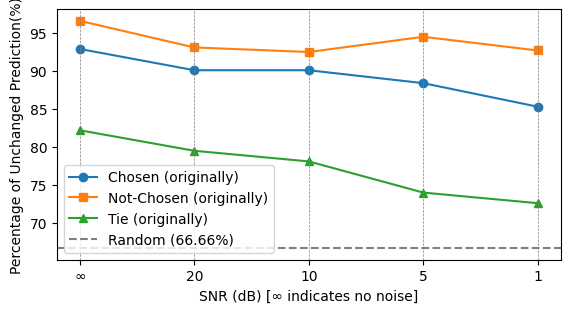

In [21]:

# Define the categorical x-axis labels (SNR conditions)
snr_labels = ['∞', '20', '10', '5', '1']
x = np.arange(len(snr_labels))  # x positions for the categories

# Data for the percentage where the model's judgement remains unchanged (\cmark)
chosen_same = [92.9, 90.1, 90.1, 88.4, 85.3]
not_chosen_same = [96.6, 93.1, 92.5, 94.5, 92.7]
tie_same = [82.2, 79.5, 78.1, 74.0, 72.6]

plt.figure(figsize=(6.5, 3.25))
plt.plot(x, chosen_same, marker='o', linestyle='-', label='Chosen (originally)')
plt.plot(x, not_chosen_same, marker='s', linestyle='-', label='Not-Chosen (originally)')
plt.plot(x, tie_same, marker='^', linestyle='-', label='Tie (originally)')

# plot a horizontal line at y=66.66% for reference
plt.axhline(y=66.66, color='gray', linestyle='--', label='Random (66.66%)')

# plot dashed vertical lines at xticks
for i in range(len(x)):
    plt.axvline(x=x[i], color='gray', linestyle='--', linewidth=0.5)

plt.xticks(x, snr_labels)
plt.xlabel('SNR (dB) [∞ indicates no noise]')
plt.ylabel('Percentage of Unchanged Prediction(%)')
# plt.title('LLM Judgement Robustness vs. Noise Level')
# put legend at bottom left
plt.legend()
# plt.grid(True)
# plt.show()

# save the plot as as pdf file, margin tight
plt.savefig('robustness_noise.pdf', bbox_inches='tight') 